# Exploring the Relationship Between Education and Income

## Introduction
In this project, we will explore the **Adult Income** dataset from the UCI Machine Learning Repository. 
The dataset contains demographic and employment information for individuals, and the primary goal is to predict 
whether an individual’s annual income is greater than \$50K or not. This analysis is specifically interested 
in understanding the impact of **education** on an individual’s probability of earning more than \$50K per year.

### Dataset Overview
The CSV file `adult.csv` has **14 features** plus the target variable (`income`). Below are the columns:

1. **age**: Numeric. Age of the individual.  
2. **workclass**: Categorical. Type of employer (e.g., Private, Self-emp, Govt).  
3. **fnlwgt**: Numeric. Final weight, a measure of the number of people in the population the census record represents.  
4. **education**: Categorical. Highest level of education (e.g., Bachelors, HS-grad).  
5. **education-num**: Numeric. Numerical encoding of education level.  
6. **marital-status**: Categorical. Marital status (e.g., Married-civ-spouse, Divorced).  
7. **occupation**: Categorical. Type of occupation (e.g., Tech-support, Sales, Exec-managerial).  
8. **relationship**: Categorical. Relationship within a household (e.g., Wife, Husband, Not-in-family).  
9. **race**: Categorical. Race (e.g., White, Black, Asian-Pac-Islander).  
10. **sex**: Categorical/Binary. Male or Female.  
11. **capital-gain**: Numeric. Income from investment sources apart from wages/salary.  
12. **capital-loss**: Numeric. Losses from investments.  
13. **hours-per-week**: Numeric. Average number of hours worked per week.  
14. **native-country**: Categorical. Country of origin (e.g., United-States, Mexico, Canada).  
15. **income** (Target): Binary. `>50K` or `<=50K`.

I will focus on **education** and **income**.

### Hypothesis
**Individuals with higher education levels are more likely to earn more than \$50K.**

The null hypothesis for this would ne that education levels don't have any significant impact on income.


The cell below runs the necessary imports for this project.

In [15]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


The cell below imports libraries to analyze the data, loads the data into a Pandas DataFrame, and sets up seaborn plotting style.

In [ ]:
# Standard library imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for consistency
sns.set_style('whitegrid')

# Loads data
df = pd.read_csv("adult.csv")


Run this cell for a quick overview of the data.

In [17]:
print("Data Shape:", df.shape)
df.head()

Data Shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## **Exploratory Data Analysis (EDA)**

We'll start by examining the dataset's structure, summary statistics, and any notable distribution patterns. This will help understand the data before we dive into hypothesis testing.

In [18]:
# Basic info on the variables in the dataset and the datatype of each
print("DataFrame Info:")
df.info()

# Distribution of income groups
print("\nIncome Distribution:")
print(df["income"].value_counts())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Income Distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype

### Visual Exploration

We'll create a few plots to visualize the distribution of `education`. We’ll also examine the relationship between `education` and `income`.

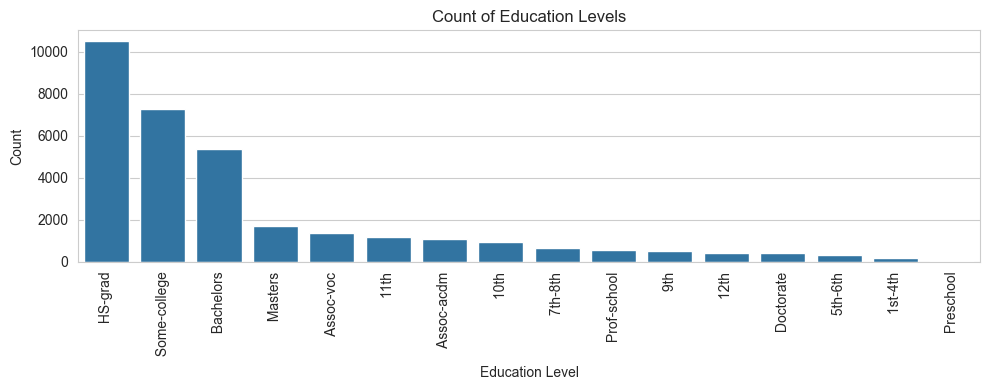

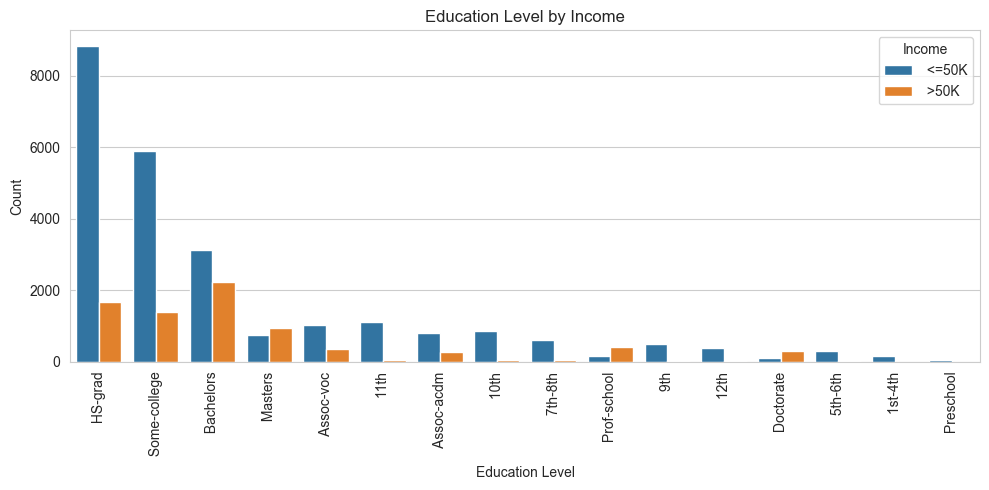

In [19]:
# Count plot of Education
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Count of Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Relationship: Education vs Income (Count)
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Education Level by Income")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Income", loc="upper right")
plt.tight_layout()
plt.show()


As you can see, HS-Grad is the most common education level of adults in this dataset. Below is a preliminary count of \<\$50k and \>\$50k statistics. At a brief glance, you can see that with higher levels of education, earners above 50k tend to outweigh earners below 50k.

## Statistical Analysis

Instead of using the categorical `education` field, we can use the numerical **`education-num`** (where numbers correlate to higher education levels) to see if higher values correlate with a greater likelihood of earning more than \$50K. 

First, let's visualize `education-num` and `income`.

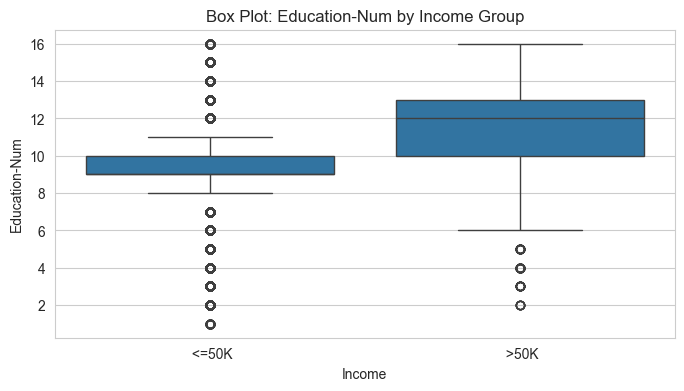

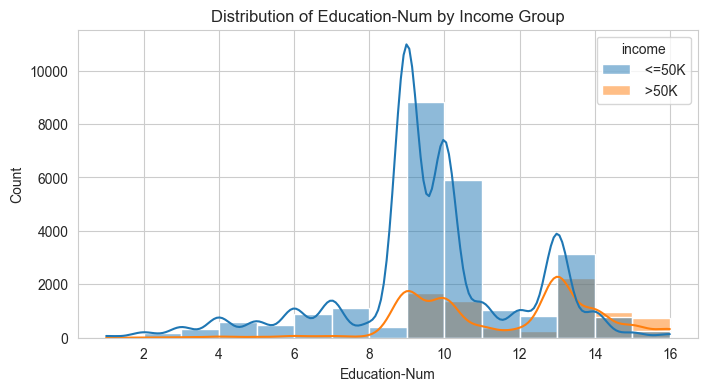

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="income", y="education-num")
plt.title("Box Plot: Education-Num by Income Group")
plt.xlabel("Income")
plt.ylabel("Education-Num")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(data=df, x="education-num", hue="income", kde=True, bins=15)
plt.title("Distribution of Education-Num by Income Group")
plt.xlabel("Education-Num")
plt.ylabel("Count")
plt.show()

The boxplot shows the education distribution of earners. The median education level of earners below \$50k and over \$50k are 9 and 12 respectively. The distribution by income group shows that as education increases, high earners approach and even surpass lower earners.

Let's quantify this difference. To do this, we'll use a two sample T-test.

Run the cell below to separate the two sample groups to compare.

In [28]:
# Separate the two groups

print(df["income"].unique())

edu_gt50k = df.loc[df["income"] == " >50K", "education-num"]
edu_le50k = df.loc[df["income"] == " <=50K", "education-num"]

[' <=50K' ' >50K']


The cell below uses SciPy to perform the two sample T-test.

In [33]:
import scipy.stats as stats

t_stat, p_val = stats.ttest_ind(edu_gt50k, edu_le50k, equal_var=False) 

print(f"T-Statistic: {t_stat:.4f}") # Quantifies the variability of the data
print(f"P-Value: {p_val:.15f}") # QUantifies the significance of the findings

alpha = 0.05 # Alpha value of 0.05 is standard value to compare p_val to in statistics
if p_val < alpha:
    print("\nConclusion: Reject null hypothesis at α=0.05.")
    print("There is a statistically significant difference in average education-num between the two income groups.")
else:
    print("\nConclusion: Fail to reject null hypothesis at α=0.05.")
    print("No statistically significant difference in average education-num between the two income groups.")

T-Statistic: 64.8960
P-Value: 0.000000000000000

Conclusion: Reject null hypothesis at α=0.05.
There is a statistically significant difference in average education-num between the two income groups.


## Conclusion

Based on our statistical test, the p-value is effectively **0**, which is significantly below our chosen significance level (α = 0.05). This indicates we have strong evidence to reject the null hypothesis. 

In practical terms, it means the difference we observe in `education-num` between individuals earning `>50K` and those earning `<=50K` is **highly unlikely** to be due to random chance. We can conclude there is a very significant relationship between an individual’s level of education and the likelihood of earning more than \$50K.
